In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
#%matplotlib notebook
plt.style.use('ggplot')

In [2]:
#see all available columns
pd.set_option('display.max_columns', None)

#reads in each csv separately
pitches = pd.read_csv('../data/pitches.csv', low_memory=False)

atbats = pd.read_csv('../data/atbats.csv', low_memory=False)

ejections = pd.read_csv('../data/ejections.csv', low_memory=False)

games = pd.read_csv('../data/games.csv', low_memory=False)

names = pd.read_csv('../data/player_names.csv', low_memory=False)

Text(0, 0.5, 'Height of Pitch')

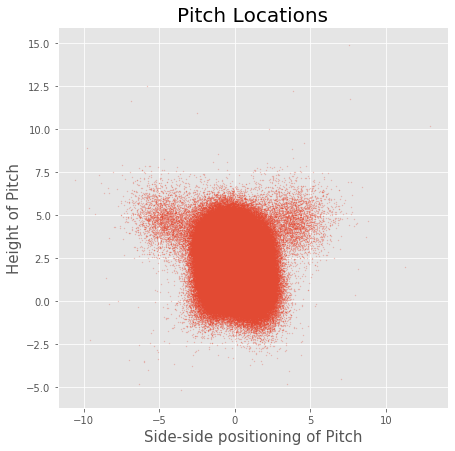

In [3]:
#plots pitch locations
plt.figure(figsize=(7,7))
plt.scatter(pitches['px'].values, pitches['pz'].values, alpha=0.2, s=1)
plt.title('Pitch Locations', size=20)
plt.xlabel('Side-side positioning of Pitch', size=15)
plt.ylabel('Height of Pitch', size=15)

In [ ]:
#how many pitches does each pitcher have 
pitches.groupby('pitch_id').count()

In [4]:
pitches.shape

(2867154, 40)

In [5]:
atbats.shape

(740389, 11)

In [6]:
names.shape

(2218, 3)

In [7]:
ejections.shape

(761, 10)

In [8]:
games.shape

(9718, 17)

In [9]:
#finds all nans and uses np.where to grab axis [0] grabs first of tuple
rows_with_nans = np.where(pitches.isna().any(axis=1) == True)[0]
#new df with dropped nans
pitches.drop(index=rows_with_nans, axis=0)

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,code,type,pitch_type,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416000,2.963000,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665000,34.685000,-11.960000,1.720000,3.560000,2.000,-6.409000,-136.065000,-3.995000,101.140000,2.280000,158.780000,50.0,5.302000,4.160000,10.930000,55.0,3.0,C,S,FF,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191000,2.347000,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043000,34.225000,-10.085000,1.720000,3.560000,2.000,-8.411000,-135.690000,-5.980000,124.280000,2.119000,175.410000,50.0,5.307000,6.570000,12.000000,31.0,5.0,S,S,FF,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518000,3.284000,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368000,35.276000,-11.560000,1.720000,3.560000,2.000,-9.802000,-137.668000,-3.337000,136.740000,2.127000,150.110000,50.0,5.313000,7.610000,10.880000,49.0,1.0,F,S,FF,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641000,1.221000,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104000,28.354000,-20.540000,1.740000,3.350000,2.000,-8.071000,-133.005000,-6.567000,109.685636,2.279000,187.463482,50.0,5.210000,1.170000,6.450000,41.0,13.0,B,B,FF,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821000,2.083000,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280000,21.774000,-34.111000,1.720000,3.560000,2.000,-6.309000,-110.409000,0.325000,146.527525,2.179000,177.242829,50.0,5.557000,-8.430000,-1.650000,18.0,13.0,B,B,CU,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867149,0.230280,1.784910,83.9,78.2,608.594,275.800,10.5,8.8,23.9,-5.097492,20.344010,-32.691751,1.535000,3.371000,0.908,-6.895539,-122.140540,-0.859601,108.220000,3.502933,190.580000,50.0,4.912177,-3.319733,-0.337153,27.0,8.0,D,X,SL,568,1.0,2.018186e+09,3.0,2.0,2.0,9.0,0.0,0.0,0.0
2867150,-1.211049,2.479020,97.7,89.5,2262.907,155.009,-26.9,2.9,23.8,9.344343,29.592944,-12.127944,1.865118,3.760455,0.892,-12.912992,-141.795182,-5.100730,163.160000,2.792346,171.850000,50.0,5.061932,4.547344,9.755265,63.0,13.0,B,B,FF,572,1.0,2.018186e+09,0.0,0.0,2.0,1.0,1.0,0.0,0.0
2867151,-0.444578,2.619287,97.3,89.6,2514.010,147.166,-40.5,3.3,23.8,13.292081,30.048939,-11.576431,1.601000,3.490000,0.898,-12.095230,-141.465465,-4.717196,133.950000,3.026107,168.060000,50.0,5.040691,6.511325,10.090051,30.0,4.0,F,S,FF,577,1.0,2.018186e+09,1.0,0.0,2.0,2.0,0.0,1.0,0.0
2867152,-0.259813,1.336484,95.9,88.6,2318.775,144.921,-34.2,3.8,23.8,12.786338,28.690698,-13.967178,1.601000,3.490000,0.910,-11.422113,-139.199258,-7.246702,126.910000,3.041058,202.740000,50.0,4.881930,6.460353,9.199100,42.0,13.0,S,S,FF,578,1.0,2.018186e+09,1.0,1.0,2.0,3.0,0.0,1.0,0.0


In [41]:
#14,000 rows where pitch type is unknown 
np.where(pitches[['pitch_type']].isna().any(axis=1) == True)[0].shape

(14189,)

In [36]:
#19,000 total rows that have atleast one NaN in them
rows_with_nans.shape

(19904,)

Text(0.5, 1, 'Count of Pitch Type')

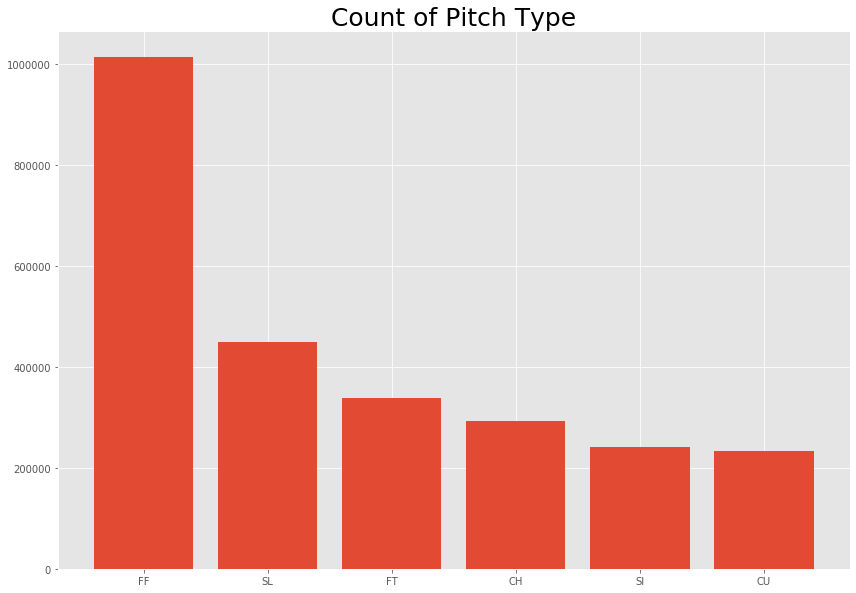

In [13]:
#x is the count of each pitch sorted
x = pitches.groupby('pitch_type').count().sort_values('px').iloc[:, 0].values[:-7:-1]
#pitch is the index of different pitches
pitch = pitches.groupby('pitch_type').count().sort_values('px').iloc[:, 0].index[:-7:-1]
plt.figure(figsize=(12,8))
plt.bar(pitch, x)
plt.tight_layout()
plt.title('Count of Pitch Type', size=25)

In [14]:
#pca need to plot these compositions with every different pitch type and look to see a difference
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_comps = pca.fit_transform(pitches.drop(index=rows_with_nans, axis=0).iloc[:, :8])

In [15]:
#top 6 most common pitches
top_6_labels = pitches.groupby('pitch_type').count().sort_values('px').iloc[:, 0].index[::-1][:6]

#first feature of pca with 2 components
x = pca_comps[:, 0]
#second feature of pac with 2 components
y = pca_comps[:, 1]
#labels of each pitch type for each row in pitches
pitch_type = pitches.drop(index=rows_with_nans, axis=0)['pitch_type'].values

Plot took 8.477895021438599 to show


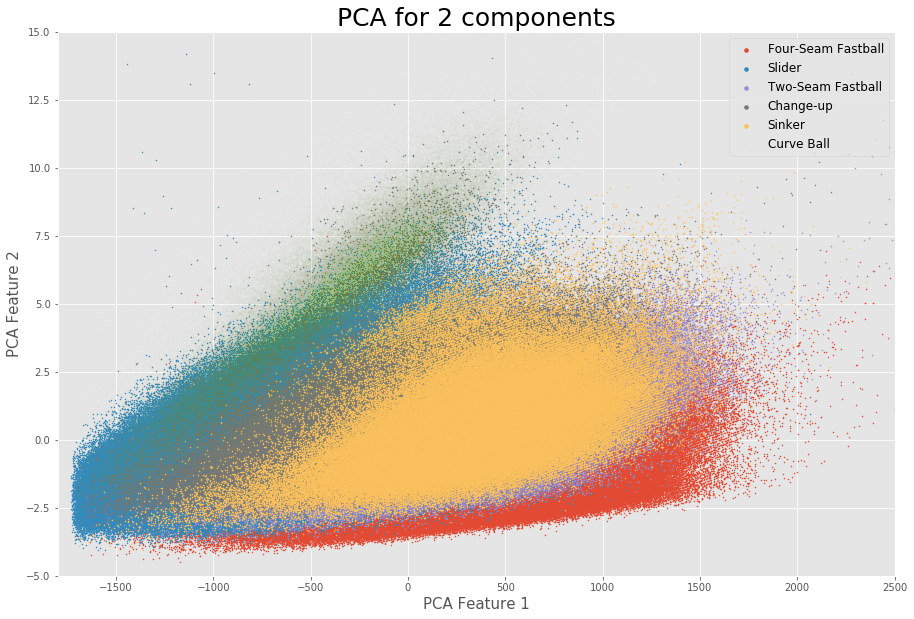

In [16]:
#grabs current time
current = time.time()
#dictionary to have nice plotting of types of pitches
dic = {'FF':'Four-Seam Fastball', 'SL': 'Slider', 'FT': 'Two-Seam Fastball', 'CH': 'Change-up', 'SI': 'Sinker', 'CU': 'Curve Ball'}


plt.figure(figsize=(15,10))
for label in top_6_labels:
    line = plt.scatter(x[pitch_type == label], y[pitch_type == label], label=label, s=1)
plt.title('PCA for 2 components', size=25)
line.set_alpha(0.02)
plt.xlabel('PCA Feature 1', size=15)
plt.ylabel('PCA Feature 2', size=15)
plt.ylim(-5, 15)
plt.xlim(-1800, 2500)
#plt.legend doesnt want to work??
plt.legend(loc=1, markerscale=4, fontsize='large', labels=dic.values())
plt.savefig('../Graphics/PCA_2_test.png', dpi=100);
print('Plot took {} to show'.format(time.time() - current))

## Takeaways from EDA
Predicting the pitch type based on the count, the pitcher, (the previous pitches??), the score, runners on 1st, 2nd, 3rd, the number of pitches thrown so far, pitcher left handed/right handed, the batter handedness, inning, so much more...

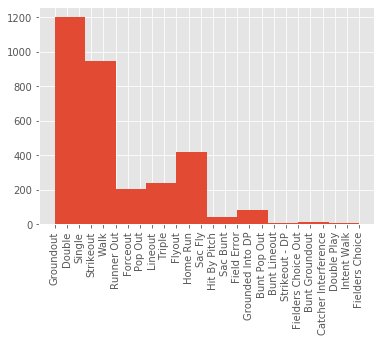

In [17]:
atbats[(atbats['pitcher_id'] == 452657)]['event'].hist()
plt.xticks(rotation=90);

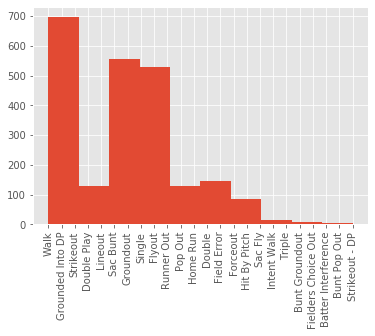

In [18]:
atbats[(atbats['pitcher_id'] == 448802)]['event'].hist()
plt.xticks(rotation=90);

In [19]:
#this pitcher has seen every batter on average of 6 times each 
atbats[(atbats['pitcher_id'] == 452657)] .groupby(['pitcher_id', 'batter_id']).count().mean()

ab_id       6.203523
event       6.203523
g_id        6.203523
inning      6.203523
o           6.203523
p_score     6.203523
p_throws    6.203523
stand       6.203523
top         6.203523
dtype: float64

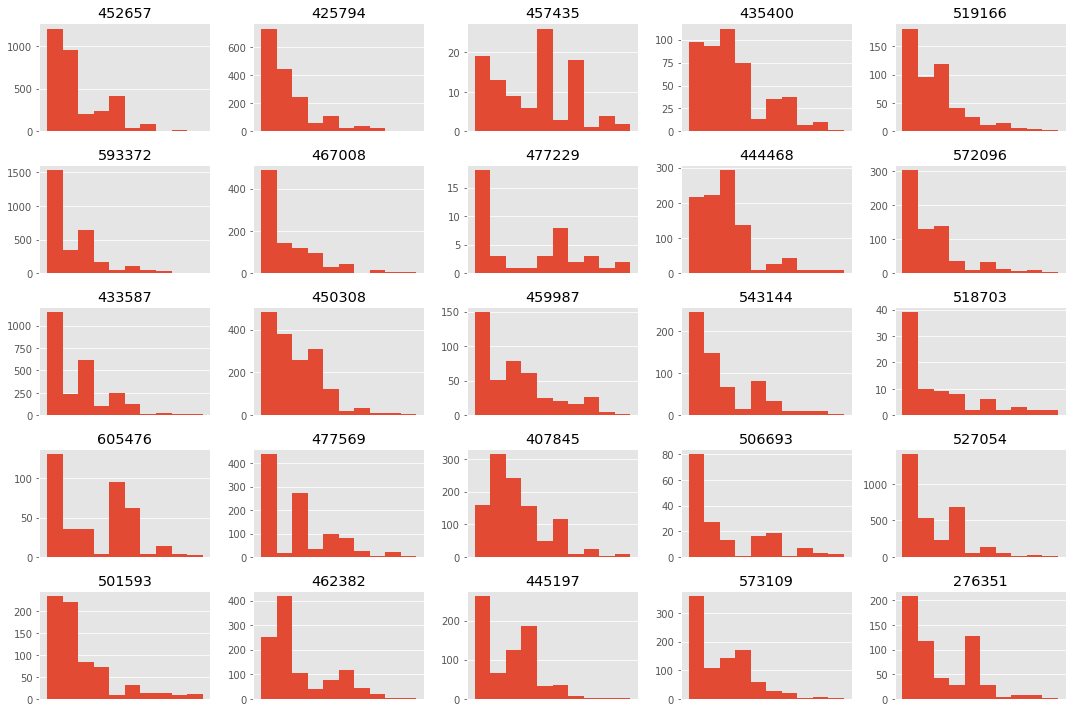

In [20]:
#looks at different pitchers and the results of all of the batters they see
fig, ax = plt.subplots(5, 5, figsize=(15, 10))
for pitcher, ax in zip(atbats['pitcher_id'].unique()[:50], ax.flatten()):
    ax.hist(atbats[atbats['pitcher_id'] == pitcher]['event'].values)
    ax.set_xticks([])
    ax.set_title(pitcher)
    
plt.tight_layout()
    

In [22]:
#in order to get a better picture lets merge atbats with pitches to see the different pictures
game_sit = pd.merge(atbats, pitches[['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir', 'break_angle', 'break_length', 'code', 'type', 'pitch_type', 'b_score', 'b_count', 's_count', 'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b', 'ab_id']], on='ab_id')

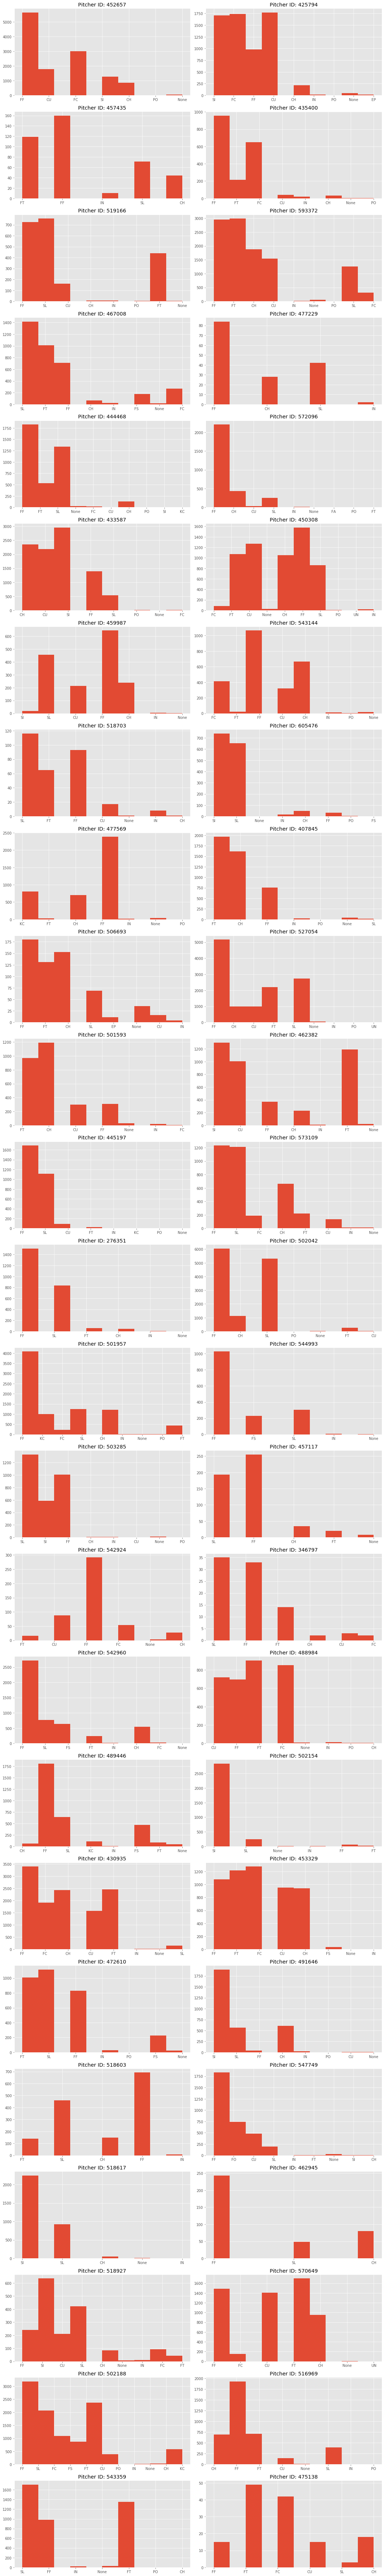

In [27]:
#looks at first 50 pitchers and observes their pitch types
fig, ax = plt.subplots(25, 2, figsize=(15, 100))
no_nan_df = game_sit.replace(np.nan, 'None')
for pitcher, ax in zip(atbats['pitcher_id'].unique()[:50], ax.flatten()):
    ax.hist(no_nan_df[no_nan_df['pitcher_id'] == pitcher]['pitch_type'])
    #ax.set_xticks()
    ax.set_title('Pitcher ID: {}'.format(pitcher))
    
plt.tight_layout() 

Text(0, 0.5, 'Number of Pitches')

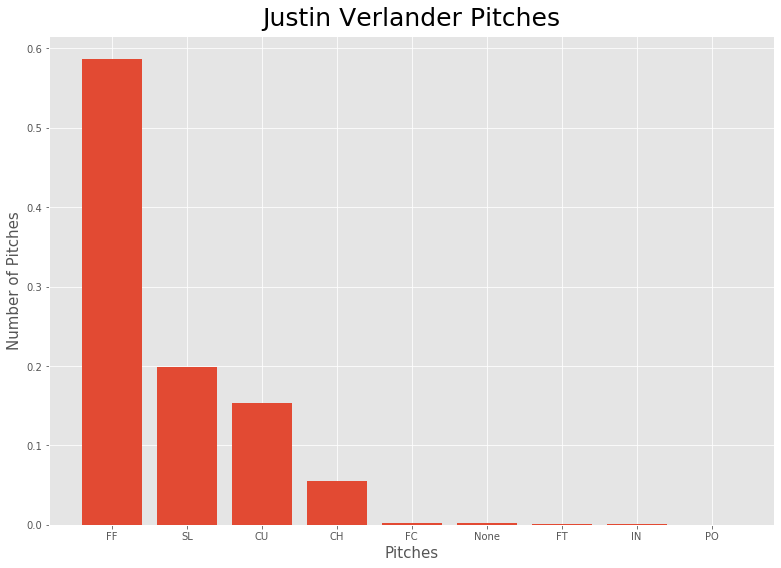

In [28]:
#looks at one pitchers distribution of pitches
nums = no_nan_df[no_nan_df['pitcher_id'] == 434378].groupby('pitch_type').count().sort_values('ab_id', ascending=False)['ab_id'].values
pitch_type = no_nan_df[no_nan_df['pitcher_id'] == 434378].groupby('pitch_type').count()[['ab_id']].sort_values('ab_id', ascending=False).index
plt.figure(figsize=(13,9))
plt.bar(pitch_type, nums/np.sum(nums))
plt.title('Justin Verlander Pitches', size=25, pad=10)
plt.xlabel('Pitches', size=15)
plt.ylabel('Number of Pitches', size=15)
#plt.savefig('../Graphics/Verlander_pitches.png', dpi=100);

Text(0, 0.5, 'Percent of Total Pitches')

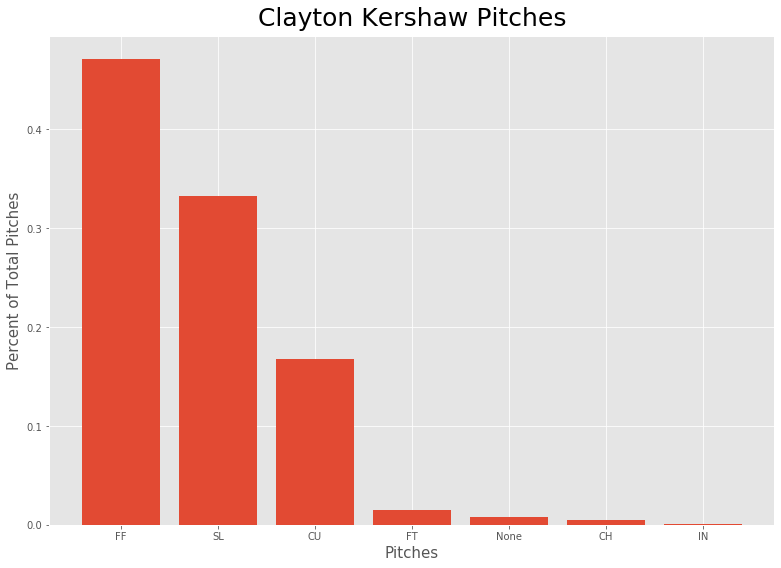

In [29]:
#Kershaw pitches
nums = no_nan_df[no_nan_df['pitcher_id'] == 477132].groupby('pitch_type').count().sort_values('ab_id', ascending=False)['ab_id'].values
pitch_type = no_nan_df[no_nan_df['pitcher_id'] == 477132].groupby('pitch_type').count()[['ab_id']].sort_values('ab_id', ascending=False).index
plt.figure(figsize=(13,9))
plt.bar(pitch_type, nums / np.sum(nums))
plt.title('Clayton Kershaw Pitches', size=25, pad=10)
plt.xlabel('Pitches', size=15)
plt.ylabel('Percent of Total Pitches', size=15)
#plt.savefig('../Graphics/Kershaw_pitches.png', dpi=100);

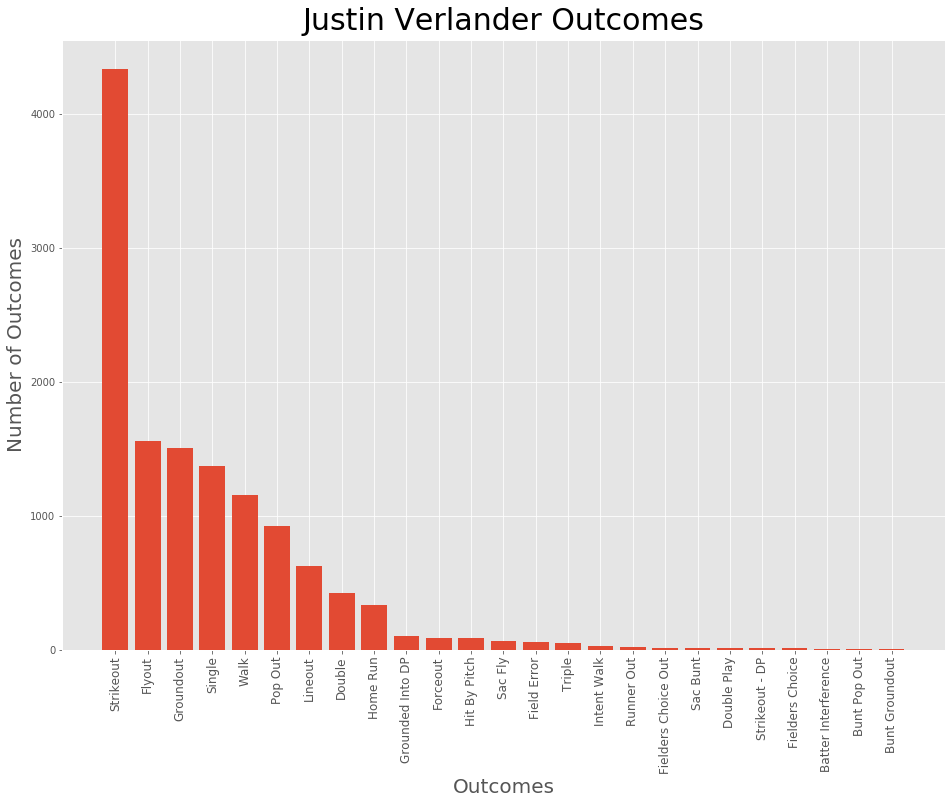

In [30]:
#distribution of outcomes of pitches
nums = no_nan_df[no_nan_df['pitcher_id'] == 434378].groupby('event').count().sort_values('ab_id', ascending=False)['ab_id'].values
outcome = no_nan_df[no_nan_df['pitcher_id'] == 434378].groupby('event').count().sort_values('ab_id', ascending=False)['ab_id'].index

plt.figure(figsize=(13,9))
plt.bar(outcome, nums)
plt.tight_layout()
plt.ylabel('Number of Outcomes', size=20)
plt.xlabel('Outcomes', size=20)
plt.title('Justin Verlander Outcomes', size=30, pad=10)
plt.xticks(rotation=90, size=12);


In [31]:
#creates full name column inside names df
names['full_name'] = names['first_name'] + ' ' + names['last_name']
#merges names with game situation df 
merged_names = pd.merge(names[['full_name', 'id']], game_sit, left_on='id', right_on='batter_id')
#merges the above merged names with the pitcher id now
final_play_df = pd.merge(merged_names, names[['full_name', 'id']], left_on='pitcher_id', right_on='id')
#renames some of the merged column names, and drops other id_x and id+y columns
final_play_df = final_play_df.rename(columns={'full_name_x':'batter_name', 'g_id':'game_id', 'o' :'post_outs', 'stand':'batter_stand', 'full_name_y':'pitcher_name'}).drop(columns=['id_x', 'id_y'])

In [32]:
final_play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867154 entries, 0 to 2867153
Data columns (total 32 columns):
batter_name     object
ab_id           int64
batter_id       int64
event           object
game_id         int64
inning          int64
post_outs       int64
p_score         int64
p_throws        object
pitcher_id      int64
batter_stand    object
top             bool
px              float64
pz              float64
start_speed     float64
end_speed       float64
spin_rate       float64
spin_dir        float64
break_angle     float64
break_length    float64
code            object
type            object
pitch_type      object
b_score         float64
b_count         float64
s_count         float64
outs            float64
pitch_num       float64
on_1b           float64
on_2b           float64
on_3b           float64
pitcher_name    object
dtypes: bool(1), float64(16), int64(7), object(8)
memory usage: 702.7+ MB


In [44]:
final_play_df = final_play_df[['pitcher_name', 'batter_name', 'ab_id', 'batter_id', 'pitcher_id', 'game_id', 'inning', 'p_score', 'p_throws', 'batter_stand', 'top', 'b_score', 'b_count', 's_count', 'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b', 'pitch_type']]
final_play_df.replace({'R': 1, 'L': 0}, inplace=True)

/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [45]:
#uses the rows_with_nans from earlier to drop unwanted rows. only rows with nans are pitch type
final_play_df.drop(index=rows_with_nans, axis=0, inplace=True)

In [46]:
#uses get dummies on pitcher names to create new features
pitch_names = pd.get_dummies(class_modeling_df['pitcher_name'])

In [47]:
#found random pitch to drop from dummy columns
import random
random.choice(pitch_names.columns)

'Bronson Arroyo'

In [49]:
#merges class_modeling with the new pitch names, drops the redundant columns 
#drops one of the pitchers from the df, Sorry 'Bronson Arroyo' you gotta go
df = class_modeling_df.merge(pitch_names, left_index=True, right_index=True).drop(columns=['ab_id', 'pitcher_name', 'batter_name', 'batter_id', 'pitcher_id', 'game_id', 'Bronson Arroyo'])

In [58]:
#80-20 train test split
X_train = df.drop(columns='pitch_type').iloc[:2293723, :]
X_test = df.drop(columns='pitch_type').iloc[2293723:, :]

y_train = df['pitch_type'][:2293723]
y_test = df['pitch_type'][2293723:]

In [ ]:
#random forest too expensive to train with this many data points
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [65]:
#moving to Logistic regression for base model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg = LogisticRegression()


In [69]:
def cross_val(estimator, X, y):
    '''
    estimator = The model you want to use with the sepcified paramters
                        ex: LogisticRegression(), RandomForestClassification() ...
                        
    data = clean dataframe you are working with, no nans
    
    clean_features = list of features you want to observe in your model
    
    target = target column you want to predict against
    '''

    kf = KFold(n_splits=5, shuffle=True)  # almost always use shuffle=True
    acc_scores = []
    #f1_scores = []
    model = estimator   
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        acc_scores.append(model.score(X_train, y_train))
        
        #change micro to weighted?
        #f1_scores.append(f1_score(y_test, y_test_pred, average='macro'))
        #f1_scores.append(f1_score(y_test, y_test_pred, average='weighted'))
        #f1_scores.append(f1_score(y_test, y_test_pred, average='micro'))

    print('F1 Mean Score of {}: {:.3f}'.format(type(model).__name__, np.mean(f1_scores)))
    #print('Accuracy Mean Score of {}: {:.3f}'.format(type(model).__name__, np.mean(acc_scores)))
    #print('Recall Mean Score of {} : {:.3f}'.format(type(model).__name__, np.mean(recall_scores)))
    #print('Precision Mean Score of {} : {:.3f}'.format(type(model).__name__, np.mean(precision_scores)))
    return model 

In [ ]:
model = cross_val(LogisticRegression(solver='lbfgs', multi_class='multinomial'), X_train.values, y_train.values)

In [62]:
def cleaning_final_df():
    #see all available columns
    pd.set_option('display.max_columns', None)
    #reads in each csv separately
    pitches = pd.read_csv('../data/pitches.csv', low_memory=False)
    atbats = pd.read_csv('../data/atbats.csv', low_memory=False)
    games = pd.read_csv('../data/games.csv', low_memory=False)
    names = pd.read_csv('../data/player_names.csv', low_memory=False)

    #merge pitches with atbats
    game_sit = pd.merge(atbats, pitches[['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir', 'break_angle', 'break_length', 'code', 'type', 'pitch_type', 'b_score', 'b_count', 's_count', 'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b', 'ab_id']], on='ab_id')

    #creates full name column inside names df
    names['full_name'] = names['first_name'] + ' ' + names['last_name']
    #merges names with game situation df 
    merged_names = pd.merge(names[['full_name', 'id']], game_sit, left_on='id', right_on='batter_id')
    #merges the above merged names with the pitcher id now
    final_play_df = pd.merge(merged_names, names[['full_name', 'id']], left_on='pitcher_id', right_on='id')
    #renames some of the merged column names, and drops other id_x and id+y columns
    final_play_df = final_play_df.rename(columns={'full_name_x':'batter_name', 'g_id':'game_id', 'o' :'post_outs', 'stand':'batter_stand', 'full_name_y':'pitcher_name'}).drop(columns=['id_x', 'id_y'])
    
    #grabs certain columns to use for modeling
    final_play_df = final_play_df[['pitcher_name', 'batter_name', 'ab_id', 'batter_id', 'pitcher_id', 'game_id', 'inning', 'p_score', 'p_throws', 'batter_stand', 'top', 'b_score', 'b_count', 's_count', 'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b', 'pitch_type']]
    final_play_df.replace({'R': 1, 'L': 0}, inplace=True)
    
    #finds all nans and uses np.where to grab axis [0] grabs first of tuple
    rows_with_nans = np.where(pitches.isna().any(axis=1) == True)[0]
    
    #uses the rows_with_nans from earlier to drop unwanted rows. only rows with nans are pitch type
    final_play_df.drop(index=rows_with_nans, axis=0, inplace=True)
    
    #uses get dummies on pitcher names to create new features
    pitch_names = pd.get_dummies(class_modeling_df['pitcher_name'])
    
    #merges class_modeling with the new pitch names, drops the redundant columns 
    #drops one of the pitchers from the df, Sorry 'Bronson Arroyo' you gotta go
    df = class_modeling_df.merge(pitch_names, left_index=True, right_index=True).drop(columns=['ab_id', 'pitcher_name', 'batter_name', 'batter_id', 'pitcher_id', 'game_id', 'Bronson Arroyo'])
    return df